# Python
## Week 3:  More pandas and matplotlib

This tutorial was done under a project between  
[National Sun Yat-sen University](http://www.nsysu.edu.tw/?Lang=zh-tw) and [United Microelectronics Corporation](http://www.umc.com/chinese/).

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Jephian Lin</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

## 1. pandas:  DataFrame

Check the official [pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) and a simple version [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) for more information.

In [3]:
import numpy as np
import pandas as pd

There are various ways to create a `DataFrame`.

Use a two-dimensional `ndarray`.

In [4]:
mtx = np.arange(15).reshape(3,5)
mtx

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
df = pd.DataFrame(mtx)
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


Use a list of `Series`.  
Each `Series` becomes a row.

In [109]:
s = pd.Series(np.arange(5))
df = pd.DataFrame([s,s * 100,s > 2])
df

,0,1,2,3,4
0,0,1,2,3,4
1,0,100,200,300,400
2,0,0,0,1,1


Use a list of dictionaries.  
Each dictionary becomes a row.  
The keys of the dictionaries becomes the names of columns.

In [117]:
d1 = {'weight': 50, 'height': 150}
d2 = {'weight': 60, 'height': 160}
d3 = {'weight': 70, 'height': 170}
df = pd.DataFrame([d1,d2,d3])
df

,height,weight
0,150,50
1,160,60
2,170,70


Read from a `csv` file by `pd.read_csv(filename)`.

In [10]:
df = pd.read_csv('clean_data.csv')
df

,Name,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
0,Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
1,Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
2,Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
3,Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


### DataFrame index and columns
If `df` is a `DataFrame`,  
`df.index` is the indices of the rows, while  
`df.columns` is the names of the columns.

In [11]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
df.columns

RangeIndex(start=0, stop=5, step=1)

You may use `.rename(dict)` to rename the indices or the columns.

In [141]:
df.rename({1:100})

,Name,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
0,Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
100,Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
2,Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
3,Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


In [142]:
df.rename({'Final': 'Final Exam'},axis=1)

,Name,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final Exam
0,Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
1,Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
2,Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
3,Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


`df.set_index(column name)` pick a column and set it as the index (row names).

In [149]:
df.set_index('Name')

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


### DataFrame selection
Use `.iloc[row index, column index]` or `.loc[row names, column names]` to **select** an entry.  

In [20]:
df = pd.read_csv('clean_data.csv')
df = df.set_index('Name')
df

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


In [21]:
print(df.iloc[0,2])
print(df.loc['Amy','HW3'])

1.5
1.5


Slicing allows you to select a sub-`DataFrame`.

In [22]:
df.loc[:,'HW1':'HW10']

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10
Name,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0


By default,  
`df.[index name]` selects a column, and  
`df.loc[index name]` selects a row.

In [23]:
df['HW7']

Name
Amy       0.5
Bill      0.0
Chris     2.0
Daniel    2.0
Name: HW7, dtype: float64

In [26]:
df.loc['Chris']

HW1          2.0
HW2          2.0
HW3          1.0
HW4          1.0
HW5          2.0
HW6          2.0
HW7          2.0
HW8          1.0
HW9          0.0
HW10         0.0
Midterm1    19.0
Midterm2    24.0
Final        9.0
Name: Chris, dtype: float64

Slicing with boolean array.

In [27]:
df[df <= 13]

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,NaN,NaN,13.0
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,NaN,13.0,6.0
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,NaN,NaN,9.0
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,NaN,NaN,NaN


**String method**  
`.str` contains many functions related to strings.

Make every string upper case.

In [30]:
df.index.str.upper()

Index(['AMY', 'BILL', 'CHRIS', 'DANIEL'], dtype='object', name='Name')

Find all string that ends with something.

In [31]:
df.index.str.endswith('l')

array([False,  True, False,  True])

Find all string that starts with something.

In [32]:
df.columns.str.startswith('HW')

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False])

Slicing with string method

In [33]:
df.loc[ df.index.str.endswith('l') ]

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


In [35]:
df.loc[:, df.columns.str.startswith('HW') ]

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10
Name,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0


### Graphs of a DataFrame

slicing, boolean slicing, view and copy, stack  
list: map, any, sum, max, min, zip, enumerate, sort  
string formating

In [2]:
weights = 50 + np.random.randint(-5,5,10)
heights = 2 * weights + 50 + np.random.randint(-5,5,10)
ages = np.random.randint(30,80,10)
df = pd.DataFrame({'weight': weights, 'height': heights, 'age': ages})
df

,weight,height,age
0,46,139,58
1,47,139,38
2,46,140,79
3,54,156,47
4,46,143,78
5,53,157,39
6,51,151,61
7,48,144,58
8,45,137,62
9,47,141,66


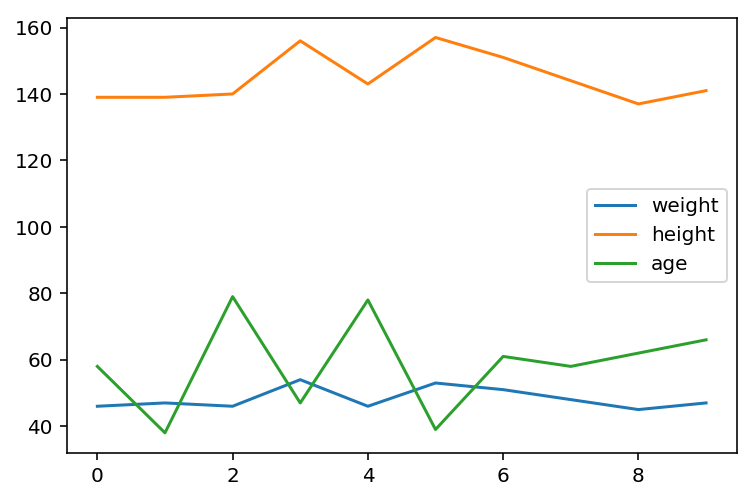

In [3]:
df.plot()

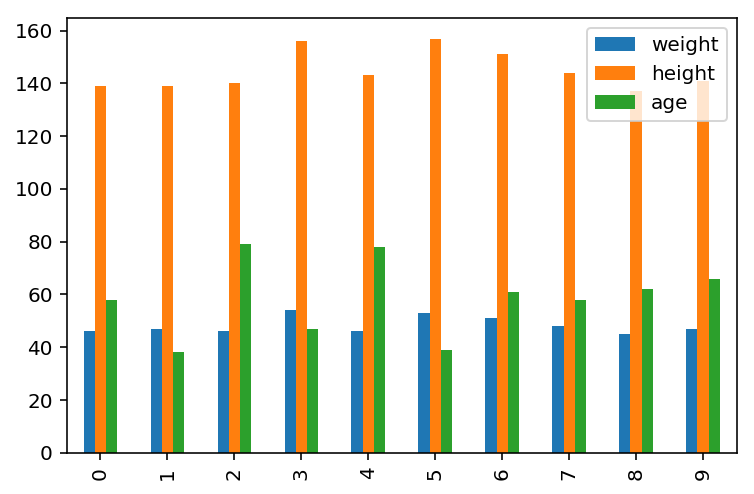

In [4]:
df.plot.bar()

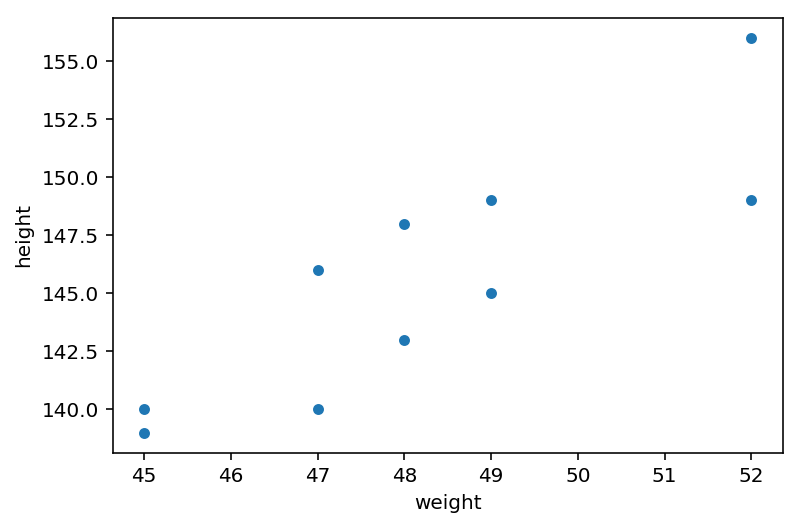

In [52]:
df.plot.scatter('weight','height')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67919a5d68>,
      dtype=object)

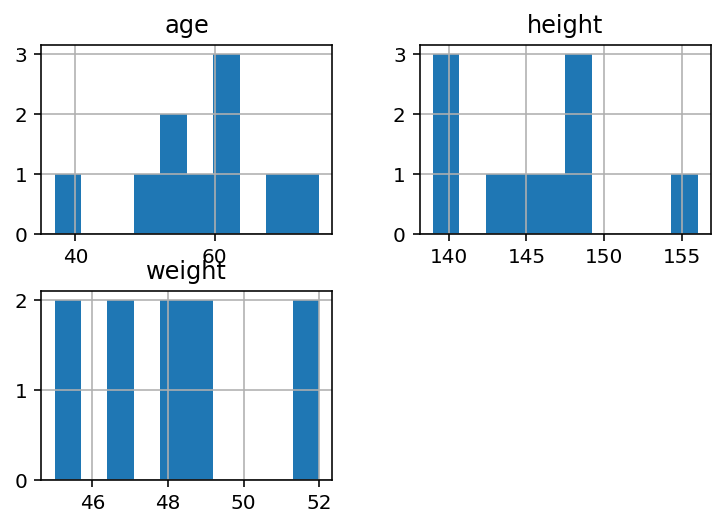

In [53]:
df.hist()

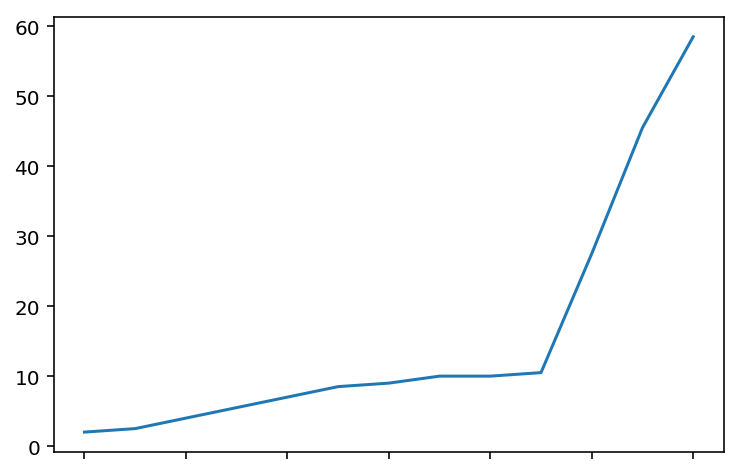

In [104]:
df.set_index('Name').loc['Amy'].cumsum().plot()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()

In [9]:
import sklearn.datasets

In [56]:
iris = sklearn.datasets.load_iris()

In [78]:
s = pd.Series(iris.target)
s[ s==0 ] = 'red'
s[ s==1 ] = 'green'
s[ s==2 ] = 'blue'
cmap = {0: 'red', 1: 'green', 2: 'blue'}

In [79]:
df = pd.DataFrame(iris['data'], columns=list('abcd'))
df['clr'] = s
df['target'] = iris.target

In [80]:
df.head()

,a,b,c,d,clr,target
0,5.1,3.5,1.4,0.2,red,0
1,4.9,3.0,1.4,0.2,red,0
2,4.7,3.2,1.3,0.2,red,0
3,4.6,3.1,1.5,0.2,red,0
4,5.0,3.6,1.4,0.2,red,0


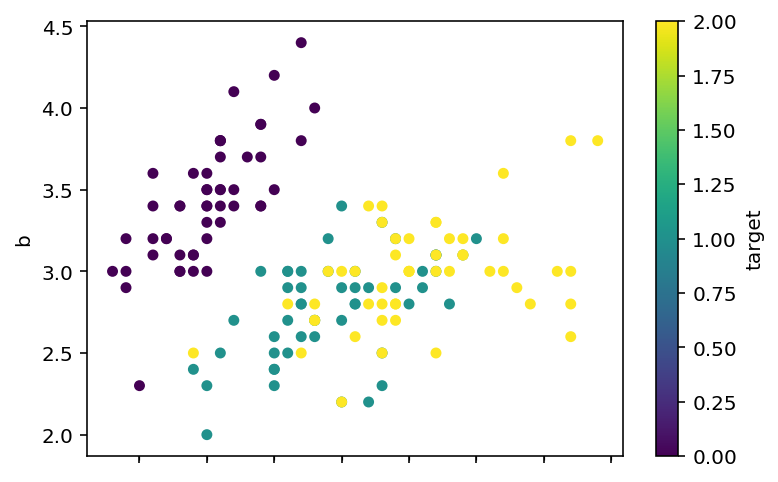

In [83]:
df.plot.scatter('a','b', c = 'target', colormap = 'viridis')

In [82]:
df.plot.scatter?

In [43]:
clrs = np.ndarray([''] * iris.target.size)

ValueError: sequence too large; cannot be greater than 32

TypeError: 'str' object cannot be interpreted as an integer

In [25]:
df.columns

Index(['a', 'b', 'c', 'd', 'target'], dtype='object')

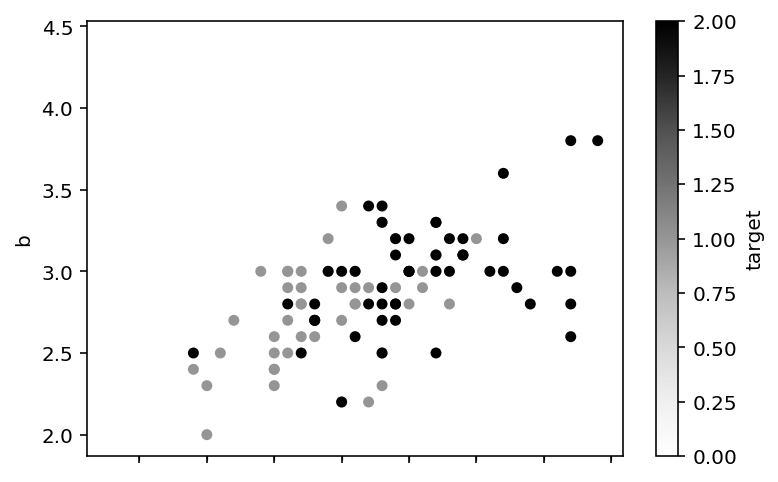

In [26]:
df.plot.scatter('a','b',c='target')

In [27]:
df.plot.scatter?

### Combo

In [ ]:
compute total

In [ ]:
sort by

#### Exercise
Clean up the data.  String formating.

## 2. matplotlib basics

[matplotlib](https://matplotlib.org/) is a plotting library.  
Using `matplotlib`, one may draw any graph from scratch.  
Indeed, many programs, including pandas, call matplotlib to produce pictures.  

But many statistical figures has routined work to do,  
so `matplotlib.pyplot` provides several convenient commands for drawing particular graphs  
such as the histogram, the bar graph, and so on.

See the official [matplotlib tutorial](https://matplotlib.org/tutorials/index.html) for more information.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Most of `matplotlib.pyplot` commands for statistics  
takes **numpy data** as the input.

`plt.plot(x,y)` connects the points in `zip(x,y)` by segments.

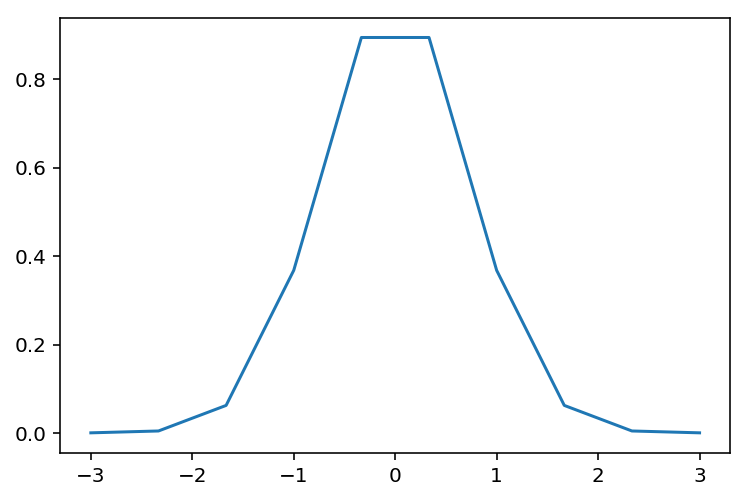

In [9]:
x = np.linspace(-3,3,10)
y = np.exp(-x**2)
plt.plot(x,y)

Make it smoother.

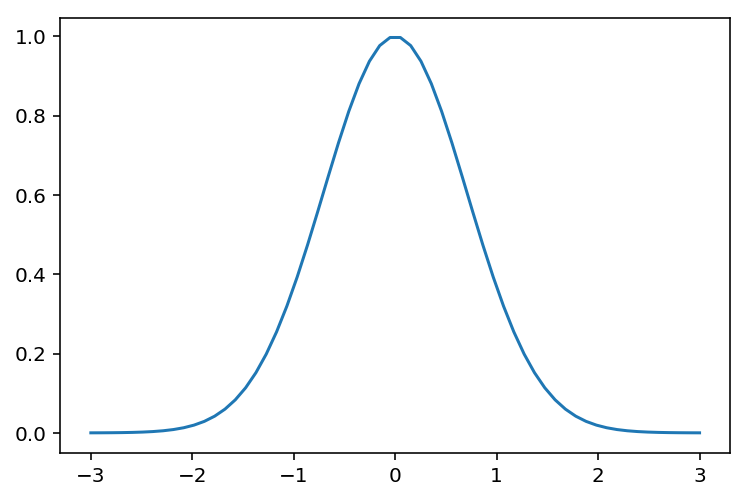

In [11]:
x = np.linspace(-3,3,60)
y = np.exp(-x**2)
plt.plot(x,y)

`plt.scatter(x,y)` plots the points in `zip(x,y)`  
but no segments in between.

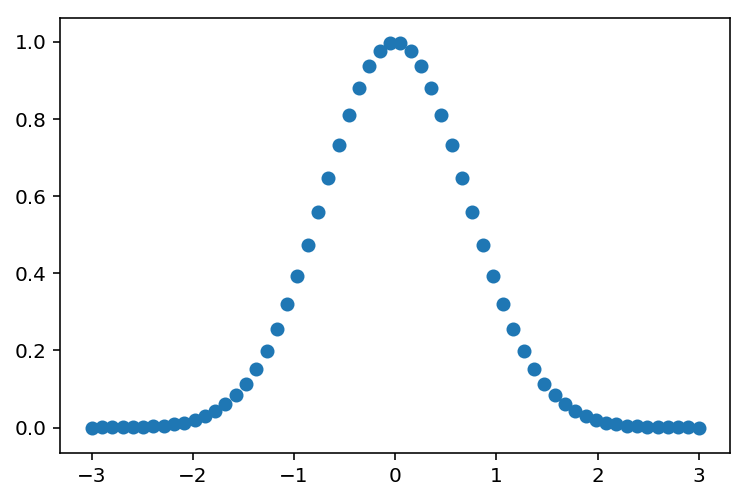

In [12]:
plt.scatter(x,y)

`plt.hist(vals)` separates data in `vals` in to `bin` categories

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  2.,  2.,  1.,  2.,  4.,  6.,  9.,
         7., 16., 14., 18., 22., 17., 30., 33., 43., 45., 39., 36., 52.,
        52., 56., 43., 51., 65., 51., 46., 26., 35., 35., 32., 17., 23.,
        13., 14.,  7.,  8.,  6.,  5.,  7.,  2.,  3.,  1.,  1.]),
 array([-3.61294833, -3.48198362, -3.35101891, -3.2200542 , -3.08908949,
        -2.95812479, -2.82716008, -2.69619537, -2.56523066, -2.43426595,
        -2.30330124, -2.17233654, -2.04137183, -1.91040712, -1.77944241,
        -1.6484777 , -1.51751299, -1.38654829, -1.25558358, -1.12461887,
        -0.99365416, -0.86268945, -0.73172474, -0.60076003, -0.46979533,
        -0.33883062, -0.20786591, -0.0769012 ,  0.05406351,  0.18502822,
         0.31599292,  0.44695763,  0.57792234,  0.70888705,  0.83985176,
         0.97081647,  1.10178117,  1.23274588,  1.36371059,  1.4946753 ,
         1.62564001,  1.75660472,  1.88756942,  2.01853413,  2.14949884,
         2.28046355,  2.41142826,  2.54239297,  2.67335768,

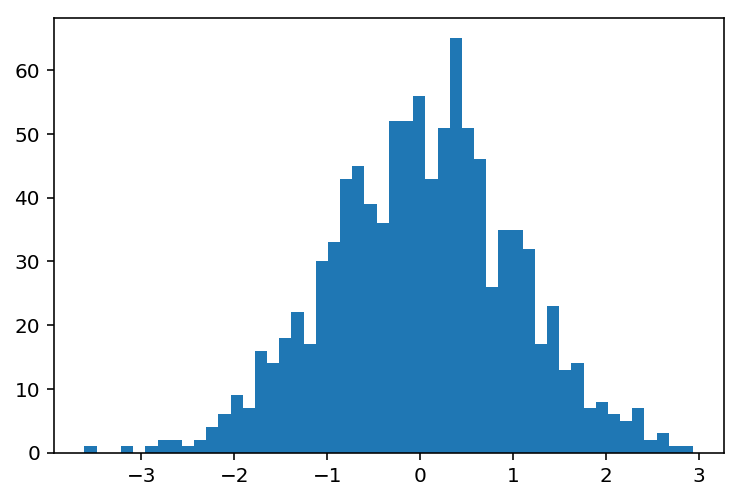

In [18]:
vals = np.random.randn(1000)
plt.hist(vals,bins=50)

`plt.bar(x,y)` draw a bar graph that has  
`x.size` bars at positions given by `x` and with heights given by `y`.

<Container object of 5 artists>

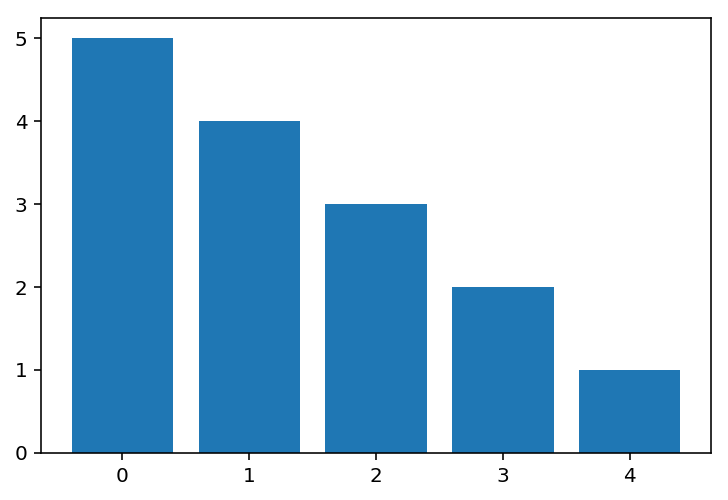

In [22]:
x = np.arange(5)
y = 5 - x
plt.bar(x,y)

In [26]:
import sklearn.datasets
iris = sklearn.datasets.load_iris()

In [29]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
data = iris.data

In [33]:
first_kind = data[ iris.target== 0 ]

(array([ 4.,  1.,  6.,  5., 12.,  8.,  4.,  5.,  2.,  3.]),
 array([4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ]),
 <a list of 10 Patch objects>)

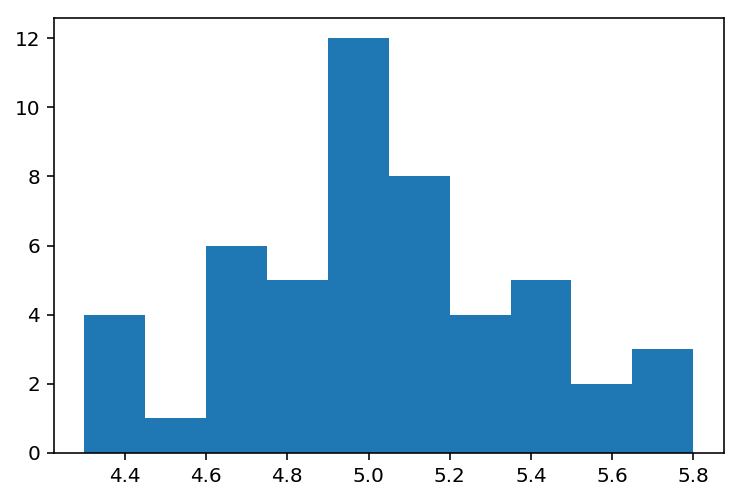

In [38]:
plt.hist(first_kind[:,0])

In [35]:
data.size

600

lots of exercises

## 3. more matplotlib
As mentioned, `matplotlib` allows you to draw almost everything.  
Knowing more fundamental ideas in `matplotlib`  
provides you more freedom to toggle with every details and create various pictures.

In [39]:
import matplotlib.pyplot as plt
import numpy as np

A `figure()` is a canvas.  
There is nothing on it by default (not even any `axes`).

In [47]:
fig = plt.figure()
fig.axes

[]

In [55]:
plt.figure(figsize=[4,6])

In [57]:
plt.gcf()

In [66]:
plt.figure(1000)
plt.show()

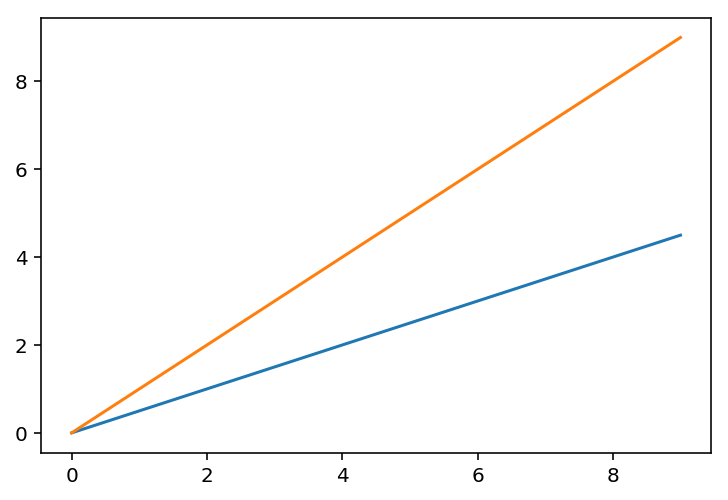

In [71]:
x = np.arange(10)
y1 = 0.5 * x
y2 = x
plt.plot(x,y1)
plt.plot(x,y2)

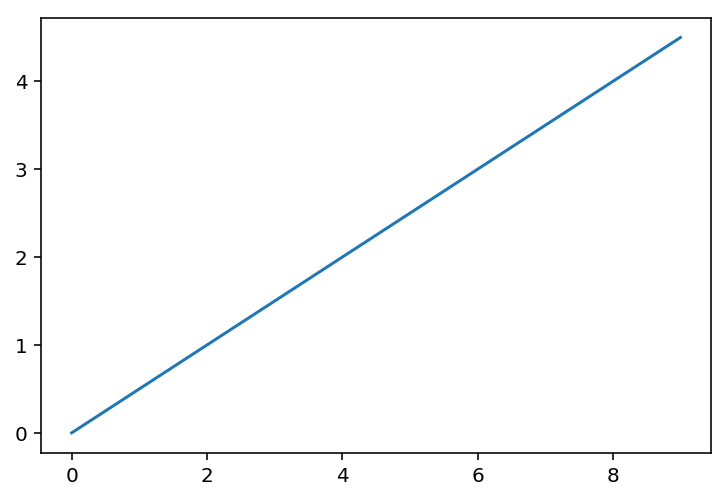

In [76]:
a = plt.plot(x,y1)

In [78]:
a